# Training and Visualizing a Decision Tree for simple classification

### Creating synthetic data

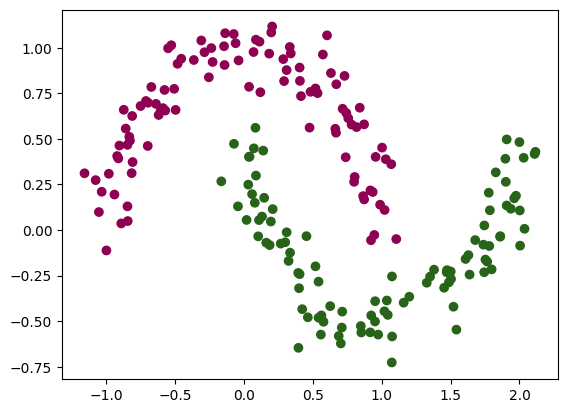

In [78]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, Y = make_moons(n_samples=200, noise=0.1,  random_state=20) #100 samples per class, X: [200, 2], Y:[200,]
plt.scatter(X[:,0],X[:,1],c=Y, cmap="PiYG")

### Training classifier and making predictions on test data

In [79]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
tree_clf1 = DecisionTreeClassifier(random_state=42)
# Train Decision Tree Classifer
tree_clf1.fit(X,Y)

#Predict the response for test dataset
y_pred = tree_clf1.predict([[0.5,-0.5],[-0.5,0.75]])
print(f"predicted labels of test data: {y_pred}")

predicted labels of test data: [1 0]


### Printing tree

In [80]:
from sklearn.tree import export_text

print(export_text(tree_clf1))

|--- feature_1 <= 0.21
|   |--- feature_0 <= -0.44
|   |   |--- class: 0
|   |--- feature_0 >  -0.44
|   |   |--- feature_1 <= -0.06
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.06
|   |   |   |--- feature_0 <= 0.66
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.66
|   |   |   |   |--- feature_0 <= 1.39
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.39
|   |   |   |   |   |--- class: 1
|--- feature_1 >  0.21
|   |--- feature_0 <= 1.45
|   |   |--- feature_1 <= 0.56
|   |   |   |--- feature_0 <= -0.43
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.43
|   |   |   |   |--- feature_0 <= 0.40
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.40
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  0.56
|   |   |   |--- class: 0
|   |--- feature_0 >  1.45
|   |   |--- class: 1



### Visualizing tree

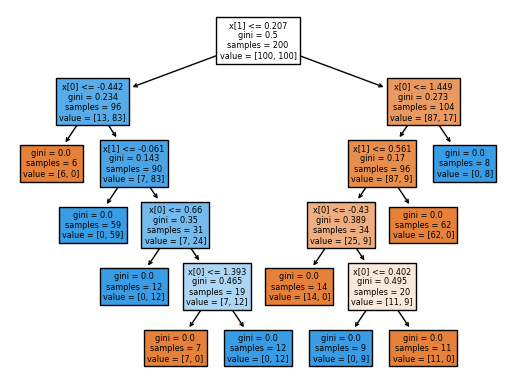

In [81]:
from sklearn.tree import plot_tree
_=plot_tree(tree_clf1, filled=True)

### Visualizing using Graphviz

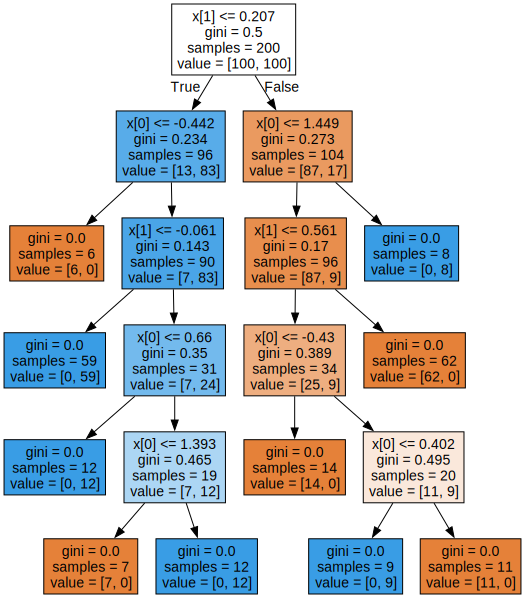

In [82]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(tree_clf1, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

### Plotting Decision Boundary

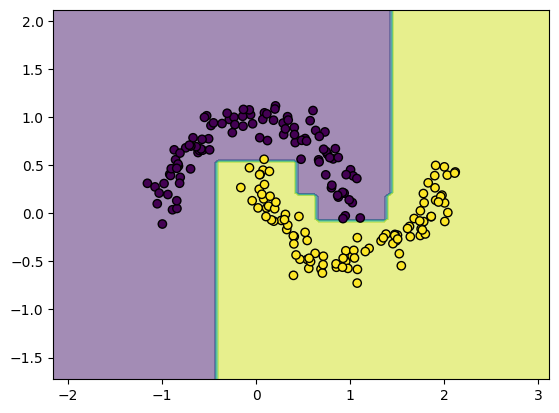

In [88]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(),1000),
    np.linspace(X[:, 1].min(), X[:, 1].max(),1000)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(tree_clf1.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay.from_estimator(tree_clf1,X,grid_resolution=100,response_method='predict',alpha=0.5)
display.ax_.scatter(
    X[:, 0], X[:, 1], c=Y, edgecolor="black"
)